# Método del gradiente

El método de descenso del gradiente es una técnica de optimización iterativa utilizada para encontrar el mínimo local de una función diferenciable. Es especialmente útil para funciones que tienen muchos mínimos locales y globales. Su popularidad ha crecido en las últimas décadas debido a su eficacia en el entrenamiento de modelos de aprendizaje automático, especialmente redes neuronales.

<img src="https://www.codificandobits.com/img/posts/2018-07-02/concepto-de-gradiente.png"/>


<img src="https://aimlsite.files.wordpress.com/2018/03/gradient-descent.png"/>

## Algoritmo del gradiente descendente

La idea básica detrás del método es simple: dada una función objetivo
$f(x)$, queremos encontrar el valor de $x$ que minimiza $f$. Para hacerlo, comenzamos en un punto inicial y seguimos los pasos en la dirección que decrece el valor de $f$ más rápidamente, es decir, en la dirección del gradiente negativo.

La formula para el cálculo del valor siguiente es

$$
x_{i+1} = x_i + α ∇f(x)
$$

Acá $α$ es el **factor de sensibilidad** o **Tasa de aprendizaje**

Un aspecto crucial del método es la elección de la **"tasa de aprendizaje"**, que determina cuán grandes son los pasos que tomamos en cada iteración. Una tasa de aprendizaje demasiado grande puede hacer que el método oscile o incluso diverja, mientras que una tasa demasiado pequeña puede hacer que el método converja muy lentamente.


<img src="https://koldopina.com/wp-content/uploads/2018/05/gd_tasa_aprendizaje.jpg"/>


El error del método de puede calcular de varias formas


$$
er = |\frac{x_{i+1} - x_i}{x_{i+1}}| * 100\%
$$

$$
|x_{i+1}-x_i| ≈ 0
$$

$$
|∇f(x_i)| ≈ 0
$$



Como este método es divergente se debe agregar una condición de parada. Si no se alcanza convergencia el método no va a parar, entonces se debe agregar otro parámetro, el **max_iterations** que si no se alcanza convergencia entonces cuando se llegue al **máximo de iteraciones** se frena el algoritmo.

In [3]:
import sympy as sp

def gradient_descent_univariate(f, variable, ci = 0, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """
    Implementa el método de descenso del gradiente para minimizar una función univariada f.

    Parámetros:
    - f: función univariada a minimizar.
    - variable: variable de f.
    - learning_rate: tasa de aprendizaje (tamaño del paso).
    - max_iterations: número máximo de iteraciones.
    - tolerance: tolerancia para la convergencia.

    Retorna:
    - Lista con los puntos de cada iteración.
    """

    # Calcula la derivada de f
    derivative = sp.diff(f, variable)

    # Punto inicial (por simplicidad, usamos ci)
    points = [ci]

    for iteration in range(max_iterations):
        # Calcula el valor de la derivada en el punto actual
        gradient_value = derivative.subs(variable, ci)

        # Actualiza el punto actual
        ci -= learning_rate * gradient_value

        # Guarda el punto actual en la lista de puntos
        points.append(ci)

        # Condiciones de parada
        if abs(gradient_value) < tolerance:
            break

    return points

# Ejemplo
x = sp.symbols('x')
f = x**2 + 4*x + 4
points = gradient_descent_univariate(f, x)
print(points[-1])  # Debería aproximarse a -

-1.99999951527986


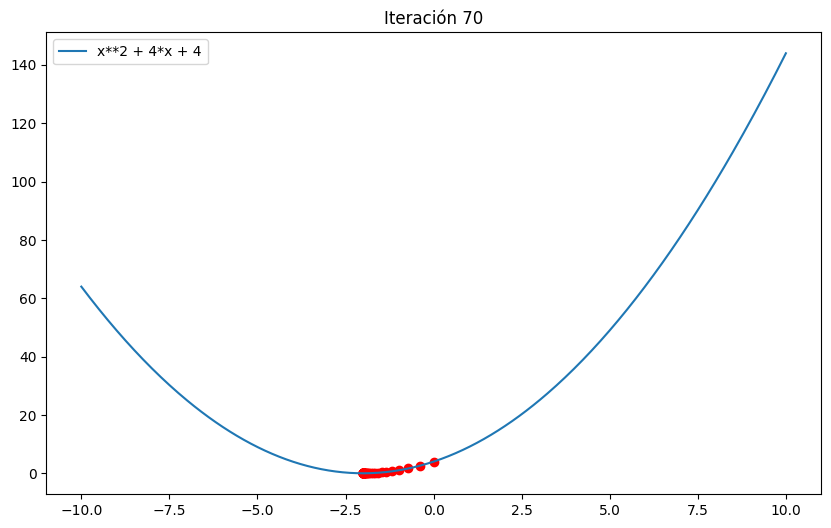

Solución:  -1.99999967089909


In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def gradient_descent_univariate(f, variable, ci = 0,learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """
    Implementa el método de descenso del gradiente para minimizar una función univariada f.

    Parámetros:
    - f: función univariada a minimizar.
    - variable: variable de f.
    - learning_rate: tasa de aprendizaje (tamaño del paso).
    - max_iterations: número máximo de iteraciones.
    - tolerance: tolerancia para la convergencia.

    Retorna:
    - Lista con los puntos de cada iteración.
    """

    # Calcula la derivada de f
    derivative = sp.diff(f, variable)

    # Punto inicial (por simplicidad, usamos ci)
    points = [ci]

    # Convertir f a una función numérica para graficar
    f_lambda = sp.lambdify(variable, f, "numpy")
    x_vals = np.linspace(float(ci) - 10, float(ci) + 10, 400)
    y_vals = f_lambda(x_vals)

    for iteration in range(max_iterations):
        # Calcula el valor de la derivada en el punto actual
        gradient_value = derivative.subs(variable, ci)

        # Actualiza el punto actual
        ci -= learning_rate * gradient_value

        # Guarda el punto actual en la lista de puntos
        points.append(ci)

        # Grafica la función y la trayectoria del punto
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label=str(f))
        plt.scatter(points, [f_lambda(p) for p in points], color='red')
        plt.title(f"Iteración {iteration + 1}")
        plt.legend()
        plt.show()

        # Pausa para visualizar la gráfica
        time.sleep(0.1)

        # Condiciones de parada
        if abs(gradient_value) < tolerance:
            break

    return points

# Ejemplo
x = sp.symbols('x')
f = x**2 + 4*x + 4
points = gradient_descent_univariate(f, x,learning_rate=0.1)
print("Solución: ", points[-1])

### Enlace extra

https://github.com/MoraRubio/ai-learning-resources/blob/main/supervised-learning-ml/gradient-descent.ipynb

## Tarea

Ajuste el algoritmo para que resuelva cualquier tipo de ecuación y halle un máximo o un mínimo. Muestre el error, las iteraciones y convergencia del método.

Pruebe el método con alguna función, y compruebelo con diferentes tasas de aprendizaje.

In [ ]:
## TU CÓDIGO VA ACÁ

## HASTA ACÁ